[src](http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching_files/MDP.pdf)

## Markov Process
* MDP is a lot of things
    * optimial control is continuous MDP
    * bandits are MDP with 1 state
* $P[S_{t+1}|S_t] = P[S_{t+1} | S_t, S_{t-1}..., S_1]$
* $P_{ss'} = P[s'|s]$
* P is a matrix of nxn, where each row sums to 1

### Markov Chain
* $<S, P>$, a finite set of states and the transition matrix

### Markov Reward Process
* $<S, P, R, \gamma>$
    * $R$ is a reward function, $R_s = E[R_{t+1} | S_t = s]$, so like reward in the next step after choosing this state
    * $\gamma$ is a discount factor, $\in [0, 1]$

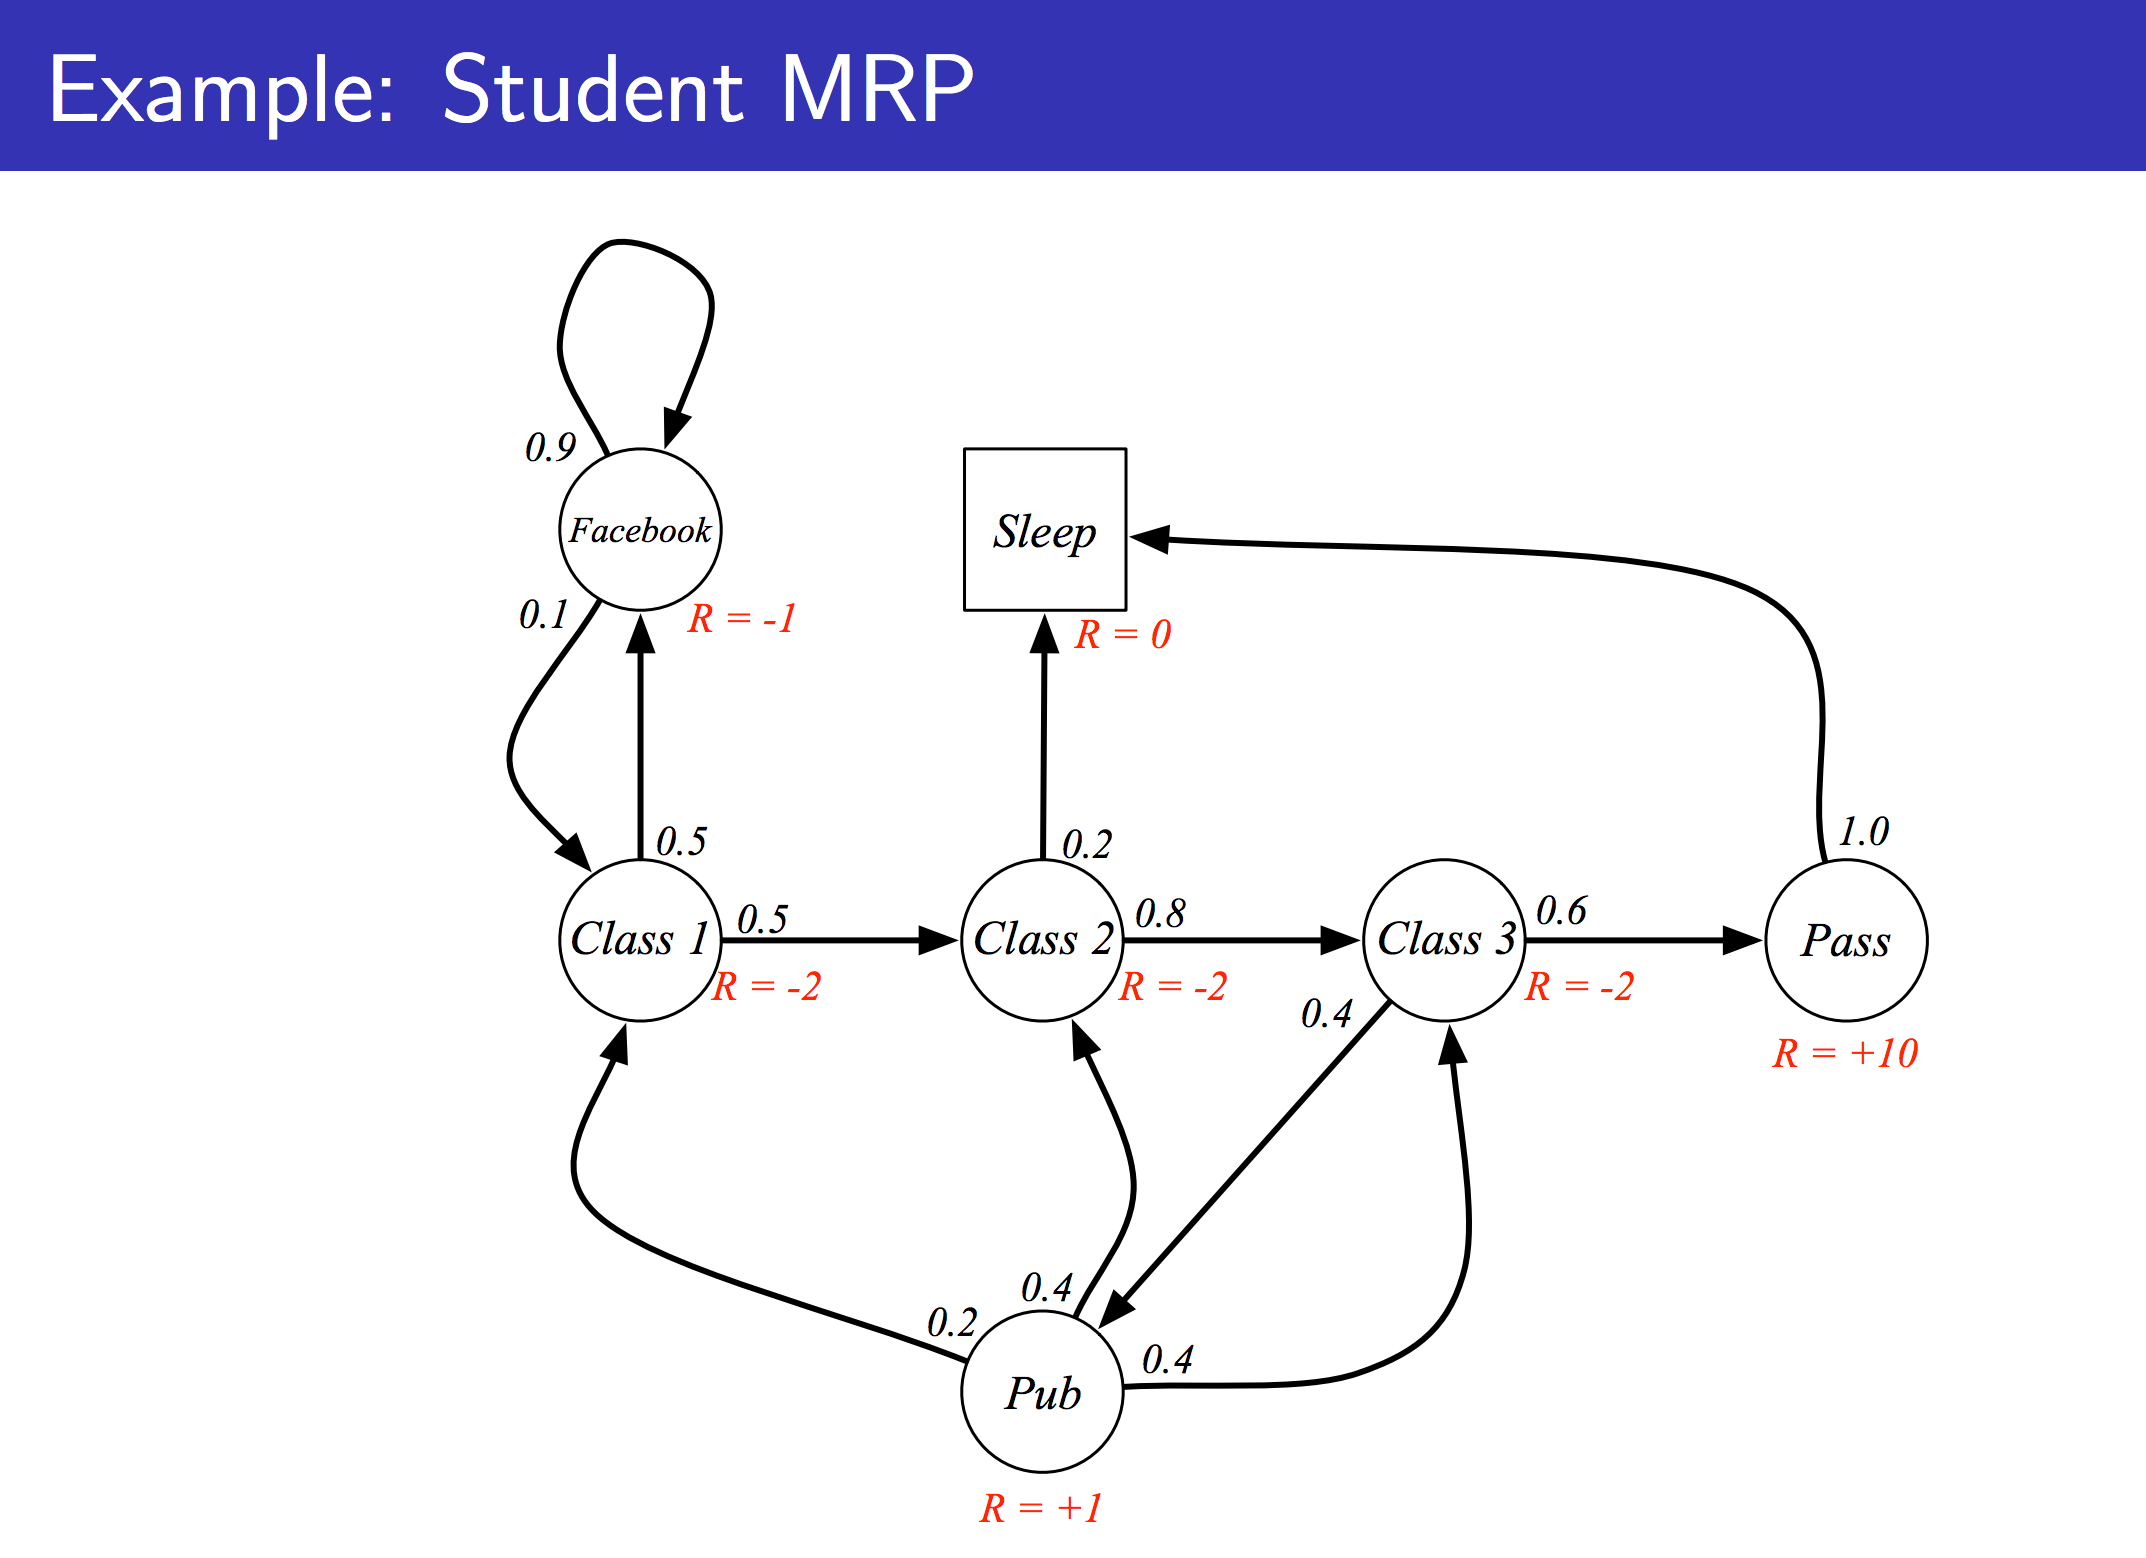

In [1]:
from IPython.display import Image
Image(filename='images/Student_MRP.png') 

* return $G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + ... = \sum_{k=0}^{\inf} \gamma^k R_{t+k+1}$
    * $\gamma = 0$ is myopic, $\gamma = 1$ is far-sighted
* value function gives long term value of state s $v(s) = E[G_t | S_t = s]$
* bellman equation 
    * $v(s) = E[G_t | S_t = s]$
    * $= E[R_{t+1} + \gamma R_{t+2} + ... | S_t = s]$
    * $= E[R_{t+1} + \gamma v(S_{t+1}) ]$
* $v(s) = R_s + \gamma \sum_{s' \in S} P_{ss'} v(s')$
* matrix form $v = R + \gamma P v$, where v and R are vectors of nx1
* can be solved via:
    * Dynamic programming
    * Monte-Carlo evaluation
    * Temporal-Difference learning

### Markov Decision Process
* Markov Reward Process + Decision
* $<S, A, P, R, \gamma>$
* A policy $\pi$ is a distribution over actions given states
    * $\pi(a|s) = P[A_t = a | S_t = s]$
    * $P^{\pi}_{s,s'} = \sum_{a \in A} \pi(a|s) P^{a}_{ss'}$
    * $R^{\pi}_s = \sum_{a \in A} \pi(a|s) R_s^a$
* action value function (q) is the expected return starting from state s, taking action a, and then following policy $\pi$
    * $q_{\pi} (s, a) = E_{\pi} [G_t | S_t = s, A_t = a] = E_{\pi} [R_{t+1} + \gamma q_{\pi} (S_{t+1), A_{t+1}} | S_t = s, A_t = a] $
    * $v_{\pi} (s) = \sum_{a \in A} \pi (a | s) q_{\pi} (s, a) $
    * $q_{\pi} (s, a) = R^a_s + \gamma \sum_{s' \in S} P_{ss'}^a v_{\pi} (s')$
    * $v_{\pi} (s) = \sum_{a \in A} \pi(a|s) (R_s^a + \gamma \sum_{s' \in S} P^a_{ss'} v_{\pi} (s'))$
    * $q_{\pi} (s, a) = R^a_s + \gamma \sum_{s' \in S} P^a_{ss'} \sum_{a' \in A} \pi(a'|s') q_{\pi} (s', a')$ 

### Bellman updates
* $v_{\pi} = R^{\pi} + \gamma P^{\pi} v_{\pi}$
* optimal state-value function v∗(s) is the maximum value function over all policies
    * $v_* (s) = max_{\pi} v_{\pi} (s)$
    * $v_* (s) = max_{a} q_{*} (s,a)$
    
    